<font size=+4><b>TP CNN with MNIST</b></font>

Diane LINGRAND 

diane.lingrand@univ-cotedazur.fr   

Polytech SI4 - 2024-2025

# Introduction

In [117]:
import torch

import random
import numpy as np
import xml.etree.ElementTree as ET
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import to_categorical

<font color="green"><b>Question:</b></font> Load the MNIST data as you did in the MLP lab but don't reshape x_train and x_test on a vector: you have to keep the 2D dimensions of images.

In [141]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Build your own CNN network

Start with the simplest CNN: 1 conv2D layer + 1 pooling + 1 dense layer.

In [145]:
nbClasses = 10

y_train = to_categorical(y_train, nbClasses)
y_test = to_categorical(y_test, nbClasses)

model = Sequential()
model.add(Conv2D(8,(3,3),padding='same',strides=3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(16,(3,3),padding='same',strides=3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(nbClasses, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

<font color="green"><b>Question:</b></font>Observe the dimension of all inputs and outputs. If the last dimension of input_shape is omitted, you'll get an error message because a tensor of (nbImages, width, height, nbChannels) is mandatory for this Conv2D. We thus need to reshape x_train and x_test to (nbImages, 28, 28, 1).

In [148]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 10, 10, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 10, 10, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 2, 2, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 2, 2, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,514 (5.91 KB)

 Trainable params: 1,466 (5.73 KB)

 Non-trainable params: 48 (192.00 B)

<font color="green"><b>Question:</b></font> Learn and evaluate this network (performances, history, energy consumption ...). Compare with last week.

In [151]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f} %")

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2767 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1011 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0980 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0971 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0983 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0996 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 9/15
750/750 ━━━━━

In [ ]:
model.summary()
print("\033[1mTest accuracy:\033[0m\033[1m\033[32m {:.2f} %\033[0m".format(test_accuracy * 100))

<font color="green"><b>Question:</b></font> Observe that the number of filters and their size correspond to one set of filters you have used in SI3. Display the weights and bias of the network. 
Hints:
- summary() methode will display the names of all layers.
- model.get_layer('aName') will return weights and biases. 

In [170]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 10, 10, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 10, 10, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 2, 2, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 2, 2, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,982 (11.65 KB)

 Trainable params: 1,466 (5.73 KB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 1,468 (5.74 KB)

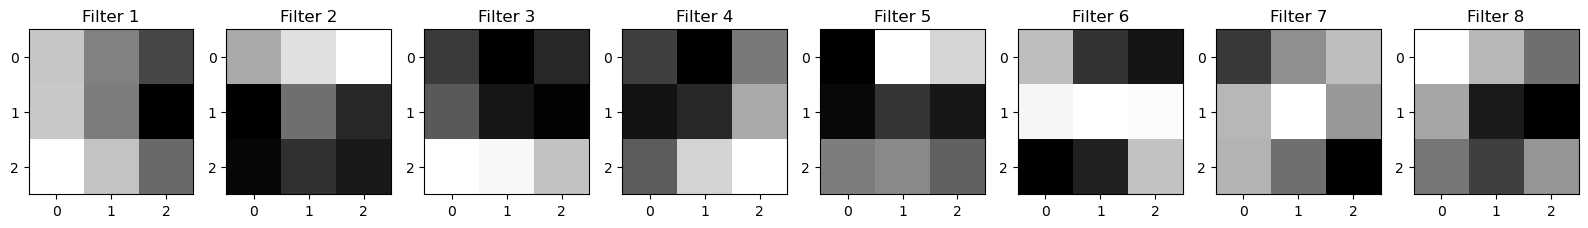

In [201]:
conv_layer = model.get_layer('conv2d_32')

conv_weights, conv_biases = conv_layer.get_weights()
filter_count = conv_weights.shape[-1]

fig, axs = plt.subplots(1, filter_count, figsize=(20, 5))

for i in range(filter_count):
    axs[i].imshow(conv_weights[:, :, 0, i], cmap='gray')  
    axs[i].set_title(f'Filter {i+1}')

plt.show()

<font color="green"><b>Question:</b></font> Modify the Conv2D hyperparameters, add more layers (Conv2D and pooling), learn these architectures and search for a better model than the previous one. Publish in slack, channel #si4-deep-learning your best choice of architecture.

In [ ]:
# your work